In [35]:
import copy

# Import libraries and modules
import numpy as np
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

import tarfile
import urllib

import warnings
warnings.filterwarnings('ignore')

import pickle

In [36]:
# Dataset directory
dataset_master_dir = "D:\\KIGAM_Hackathon\\Dataset\\3w_dataset-master\\data\\data.7z\\data"
os.chdir(dataset_master_dir)

dir_list = os.listdir(dataset_master_dir) # ['0', '1', '2', '3', '4', '5', '6', '7', '8']

def load_data(filename: str):
    csv_path = filename
    date_parser_ = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S.000000")
    return pd.read_csv(csv_path, sep=",", parse_dates=['timestamp'], date_parser=date_parser_)

testdata = load_data("D:\\KIGAM_Hackathon\\Dataset\\3w_dataset-master\\data\\data.7z\\data\\1\\DRAWN_00001.csv")
print(testdata)

                 timestamp     P-PDG      P-TPT       T-TPT  P-MON-CKP  \
0      2018-09-05 20:44:36  420.2314  175.34060  114.890700   96.64524   
1      2018-09-05 20:44:37  420.2314  175.34060  114.890700   96.64524   
2      2018-09-05 20:44:38  420.2314  175.34060  114.890700   96.64524   
3      2018-09-05 20:44:39  420.2314  175.34060  114.890700   96.64524   
4      2018-09-05 20:44:40  420.2314  175.34060  114.890700   96.64524   
...                    ...       ...        ...         ...        ...   
172795 2018-09-07 20:44:31  429.8329   60.13675    8.354756   12.89203   
172796 2018-09-07 20:44:32  429.8329   60.13789    8.354756   12.89203   
172797 2018-09-07 20:44:33  429.8329   60.13904    8.354756   12.89203   
172798 2018-09-07 20:44:34  429.8329   60.14018    8.354756   12.89203   
172799 2018-09-07 20:44:35  429.8329   60.14132    8.354756   12.89203   

        T-JUS-CKP  P-JUS-CKGL  T-JUS-CKGL  QGL  class  
0        66.75450         NaN         NaN  NaN      0  

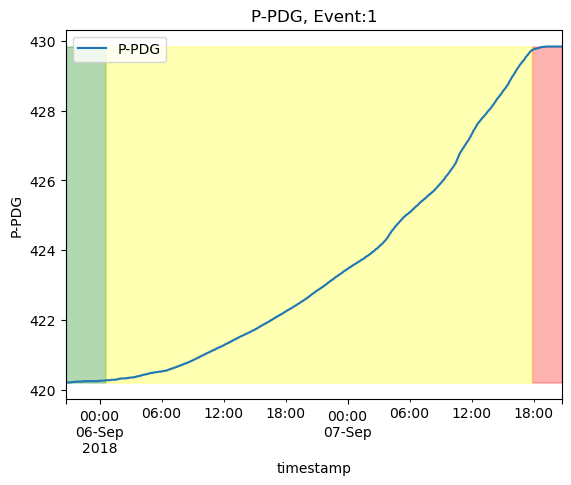

In [38]:
event = 1

# for variable in testdata.columns[1:9]:
for variable in testdata.columns[1:2]:
    plot = testdata.plot(x='timestamp', y=variable)
    plot.set_ylabel(variable)
    plot.set_title(variable + ", Event:1")
    plot.fill_between(testdata['timestamp'].to_numpy(), min(testdata[variable]), max(testdata[variable]), where=(testdata['class']==0), color='green', alpha = 0.3)
    plot.fill_between(testdata['timestamp'].to_numpy(), min(testdata[variable]), max(testdata[variable]), where=(testdata['class']==event), color='red', alpha = 0.3)
    plot.fill_between(testdata['timestamp'].to_numpy(), min(testdata[variable]), max(testdata[variable]), where=(testdata['class']==event+100), color='yellow', alpha = 0.3)
    # plot.savefig(Event num. + Filename + Variable.png)
    fig = plot.get_figure()
    fig.savefig('test.png') # Can assign directory to save figures.
